# Exercícios - Regressão Logística

In [2]:
# Imports utilizados em todos os exercícios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# Import da biblioteca warnings para ignorar eventuais warnings
import warnings
warnings.filterwarnings('ignore')

### Questão 1:

Utilizando da base de dados _iris.csv_, desenvolva um modelo de classificação com a Regressão Logística para a identificação das espécies da flor. Crie uma `classification_report` e uma matriz de confusão para os dados de teste.

### Resolução:

In [3]:
# Carrega a base da iris
iris = pd.read_csv('iris.csv')

In [4]:
# Overview no DataFrame
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# Plot dos primeiros resultados do DataFrame
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Utilizando o `pairplot` do _seaborn_ vamos entender como as variáveis se relacionam:

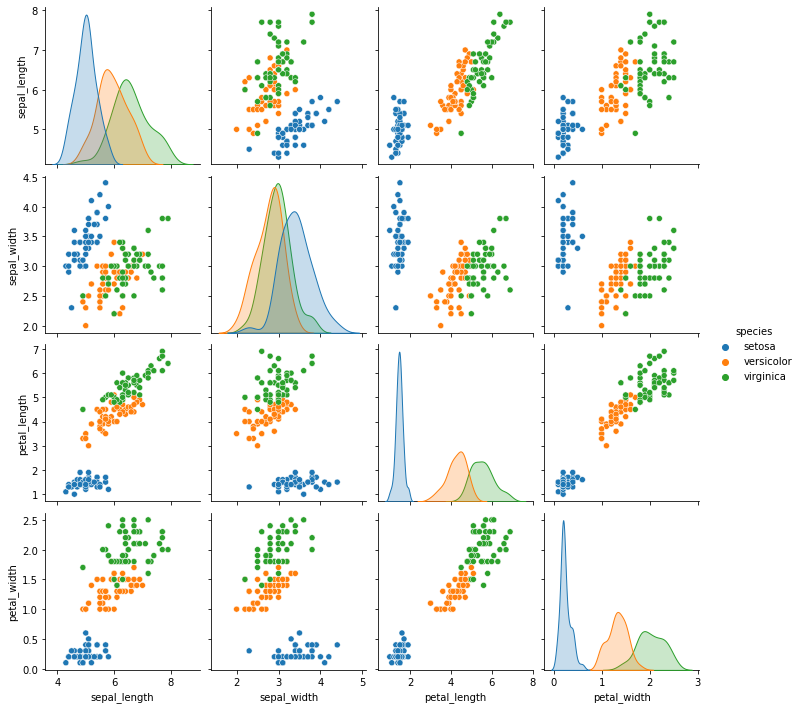

In [6]:
# Plot do pairplot
sns.pairplot(iris, hue='species')

# Mostra o gráfico
plt.show()

Vamos começar a preparação dos dados para a Regressão Logística:

In [7]:
# Remove a coluna species da base de features
X = iris.drop(['species'], axis = 1)

# Separa a target
y = iris['species']

In [10]:
# Separa os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [11]:
# Define como será feito a normalização
scaler = StandardScaler()

In [12]:
# Normalizando os dados de treino e teste
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [13]:
# Instanciando o modelo
model = LogisticRegression()

In [14]:
# Fit do Modelo
model.fit(X_train, y_train)

LogisticRegression()

In [15]:
# PRedições para a base de teste
y_pred = model.predict(X_test)

In [16]:
# Classification Report dos Resultados
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



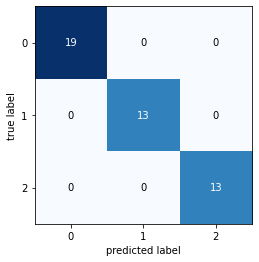

In [17]:
# Define a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Cria o plot da matriz de confusão
plot_confusion_matrix(conf_mat=cm)

# Mostra o gráfico
plt.show()

A qualidade do resultado na Iris é excelente e isso se deve a separação entre as classes da Iris serem bem definidas, conforme visto no `pairplot`.

## 

### Questão 2:

A partir da base de alunos indianos `Admission_Predict.csv`, utilize uma Regressão Logística para classificar quais alunos têm chance de admissão ou não. Para esse exercício será preciso construir a resposta para o modelo utilizando a variável `Chance of Admit` e para isso vamos testar dois cenários:

__A)__ Utilize como critério para a construção da resposta, os alunos que tiveram chance de admissão maior que 50%;

__B)__ Determine outra faixa de corte de acordo com a distribuição da chance de admissão dos alunos.

### Resolução:

__A)__ Utilize como critério para a construção da resposta, os alunos que tiveram chance de admissão maior que 50%;


In [32]:
# Carrega o DataFrame
grades = pd.read_csv('Admission_Predict.csv')

In [33]:
# verificando a consistência da base
grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [34]:
# Print das primeiras linhas do DataFrame
grades.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Vamos construir a resposta (_target_) utilizando o critério de 50% ou mais:

In [35]:
grades50 = grades.copy()

In [36]:
# Cria a variável resposta
grades50['Chance of Admit '] = np.where(grades50['Chance of Admit '] > 0.5, 1, 0)

In [38]:
# Avaliar a distribuição nas classes
grades50['Chance of Admit '].value_counts()

1    365
0     35
Name: Chance of Admit , dtype: int64

In [39]:
# Removendo a target da base X
X = grades50.drop(['Chance of Admit '], axis = 1)

# Isolando a target
y = grades50['Chance of Admit ']

In [40]:
# Separação em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 42,
                                                    stratify = y) #usar o stratify com base desbalanceada

In [41]:
# Definindo a Normalização
scaler = StandardScaler()

In [42]:
# Aplicando a normalização nas bases
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [43]:
# Instanciando o Modelo
model = LogisticRegression()

In [44]:
# Fit do Modelo
model.fit(X_train_std, y_train)

LogisticRegression()

In [45]:
# Predições para a base de teste
y_pred = model.predict(X_test_std)

In [46]:
# Classification Report do Resultado?
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.55      0.52        11
           1       0.95      0.94      0.95       109

    accuracy                           0.91       120
   macro avg       0.73      0.75      0.74       120
weighted avg       0.91      0.91      0.91       120



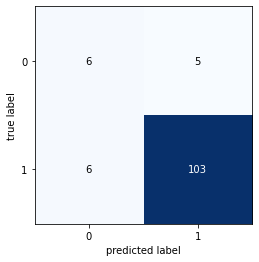

In [47]:
# Cria a matriz de Confusão
cm = confusion_matrix(y_test, y_pred)

# Plot da Matriz de Confusão
plot_confusion_matrix(conf_mat=cm)

# Mostra o Gráfico
plt.show()

Dos resultados para esse modelo, podemos perceber que tem algum problema na construção da variável resposta, pois o modelo está classificando praticamente que todos os resultados como da classe 1, ou seja que têm chances de ser admitido.

Uma forma de corrigir isso seria justamente ajustando melhor o limiar de corte da classificação (_threshold_).

__B)__ Determine outra faixa de corte de acordo com a distribuição da chance de admissão dos alunos.

In [48]:
# vamos avaliar as principais estatísticas do DataFrame
grades.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


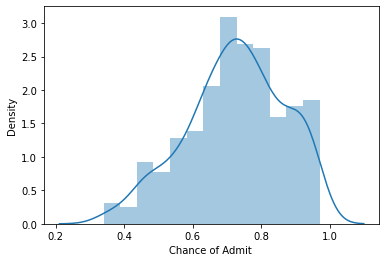

In [49]:
# Cria um gráfico de distribuição para a chance de admissão
sns.distplot(grades['Chance of Admit '])

# Mostra o gráfico
plt.show()

Justamente os resultados do modelo anterior não foram bons, porque a maior parte dos alunos se encontram na faixa de mais do que 50% de chances de ser admitido. Dessa forma vamos construir a variável resposta utilizando aproximadamente a média da distribuição (72%):

In [50]:
# Cria a variável resposta
grades['Chance of Admit '] = np.where(grades['Chance of Admit '] > 0.72, 1, 0)

In [51]:
# Avaliar a distribuição nas classes
grades['Chance of Admit '].value_counts()

1    204
0    196
Name: Chance of Admit , dtype: int64

In [52]:
# Removendo a target da base X
X = grades.drop(['Chance of Admit '], axis = 1)

# Isolando a target
y = grades['Chance of Admit ']

In [53]:
# Separação em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [54]:
# Definindo a Normalização
scaler = StandardScaler()

In [55]:
# Aplicando a normalização nas bases
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [56]:
# Instanciando o Modelo
model = LogisticRegression()

In [57]:
# Fit do Modelo
model.fit(X_train_std, y_train)

LogisticRegression()

In [58]:
# Predições para a base de teste
y_pred = model.predict(X_test_std)

In [59]:
# Classification Report do Resultado?
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        65
           1       0.93      0.98      0.96        55

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



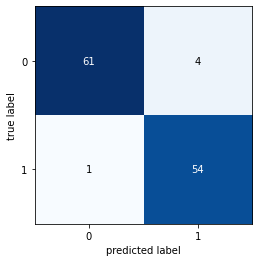

In [60]:
# Cria a matriz de Confusão
cm = confusion_matrix(y_test, y_pred)

# Plot da Matriz de Confusão
plot_confusion_matrix(conf_mat=cm)

# Mostra o Gráfico
plt.show()

## 

### Questão 3:

A base de dados `COVID.csv`, contém informações sobre os casos de COVID no México e apresenta as seguintes variáveis:

 - **id**: Identificação do paciente<br>
 - **sex**: Sexo do Paciente (0 - Homem / 1 - Mulher) <br>
 - **patient_type**: Se o paciente foi dispensado para casa (1) ou se foi internado (0) <br>
 - **intubed**: Seo paciente foi intubado ou não<br>
 - **pneumonia**: Se o paciente apresentou pneumonia ou não<br>
 - **age**: Idade do Paciente<br>
 - **pregnancy**: Se a paciente estava grávida ou não (para pacientes mulheres)<br>
 - **diabetes**: Se o paciente tem diabetes ou não<br>
 - **copd**: Se opaciente tem COPD ou não<br>
 - **asthma**: Se o paciente tem Asma ou não<br>
 - **inmsupr**: Se o paciente apresentou Imunosupressão ou não<br>
 - **hypertension**: Se o paciente tem hipertensão ou não<br>
 - **ohter_disease**: Se o paciente tem outras doenças ou não<br>
 - **cardiovascular**: Se o paciente tem doenças cardiácas ou não<br>
 - **obesity**: Se o paciente tem obesidade ou não<br>
 - **renal_chronic**: Se o paciente tem problemas renais ou não<br>
 - **tobacco**: Se o paciente é fumante ou não<br>
 - **contact_other_covid**: Se o paciente teve contato com outras pessoas diagnosticadas com covid<br>
 - **icu**: Se o paciente precisou ser internado na UTI<br>
 - **covid_res**: Se o resultado do teste foi Positivo ou Negativo<br>
 
 Iremos utilizar uma Regressão Logística para prever os casos de COVID e para desenvolva os itens abaixo:
 
 __A)__ Faça a preparação da base para o modelo;
 
 __Dica.:__ Observe que a base apresenta alguns dados faltantes, então faça o preenchimento desses dados e explique os critérios utilizados.
 
 __B)__ Desenvolva o modelo de Regressão Logística;
 
 __C)__ Para o caso do COVID, a classificação padrão da Regressão Logística é a mais adequada? (Ao aplicarmos o `predict`, o modelo vai calcular as probabilidade e para os casos maior que 0.5 ele atribui como da classe 1). Teste diferentes _thresholds_.

### Resolução:

__A)__ Faça a preparação da base para o modelo;
 
 __Dica.:__ Observe que a base apresenta alguns dados faltantes, então faça o preenchimento desses dados e explique os critérios utilizados.
 

In [64]:
# Carrega o base de dados
covid = pd.read_csv('COVID.csv', index_col=0)

In [65]:
# Avalia as condições dos dados
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499692 entries, 0 to 499691
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sex                  499692 non-null  int64  
 1   patient_type         499692 non-null  int64  
 2   intubed              107424 non-null  float64
 3   pneumonia            499681 non-null  float64
 4   age                  499692 non-null  int64  
 5   pregnancy            245258 non-null  float64
 6   diabetes             498051 non-null  float64
 7   copd                 498246 non-null  float64
 8   asthma               498250 non-null  float64
 9   inmsupr              498030 non-null  float64
 10  hypertension         498203 non-null  float64
 11  other_disease        497499 non-null  float64
 12  cardiovascular       498183 non-null  float64
 13  obesity              498222 non-null  float64
 14  renal_chronic        498216 non-null  float64
 15  tobacco          

In [66]:
# Print das primeiras linhas
covid.head()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,0,1,NaN,0.0,27,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
1,0,1,NaN,0.0,24,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,NaN
2,1,0,0.0,0.0,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,1,0.0
3,0,0,0.0,1.0,30,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,0.0
4,1,0,0.0,0.0,60,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,1,0.0


In [67]:
# Dimensões do DataFrame
covid.shape

(499692, 19)

In [69]:
# Calcula a porcentagem NaNs
(covid.isna().sum()/len(covid))*100

sex                     0.000000
patient_type            0.000000
intubed                78.501957
pneumonia               0.002201
age                     0.000000
pregnancy              50.918166
diabetes                0.328402
copd                    0.289378
asthma                  0.288578
inmsupr                 0.332605
hypertension            0.297984
other_disease           0.438870
cardiovascular          0.301986
obesity                 0.294181
renal_chronic           0.295382
tobacco                 0.315995
contact_other_covid    30.753944
covid_res               0.000000
icu                    78.502157
dtype: float64

Vamos utilizar a estratégia de preencher os valores ausentes com dados mais frequentes do mesmo sexo:

In [70]:
# Vamos separar a base de dados entre homens e mulheres
covid_male = covid[covid['sex'] == 0]
covid_female = covid[covid['sex'] == 1]

In [71]:
# Shape das bases
covid_male.shape, covid_female.shape

((253098, 19), (246594, 19))

In [72]:
# Verifica os NaNs
covid_male.isna().sum()/len(covid_male)*100

sex                      0.000000
patient_type             0.000000
intubed                 74.516590
pneumonia                0.002371
age                      0.000000
pregnancy              100.000000
diabetes                 0.386016
copd                     0.347691
asthma                   0.341765
inmsupr                  0.384041
hypertension             0.356779
other_disease            0.507708
cardiovascular           0.357964
obesity                  0.348482
renal_chronic            0.351247
tobacco                  0.379695
contact_other_covid     30.619760
covid_res                0.000000
icu                     74.516590
dtype: float64

Note que da base total, a maioria dos _NaNs_ na coluna `pregnancy` é justamente para o sexo masculino, ou seja esses tipos de dados não são colhidos no cadastro!

In [73]:
# Verificando os NaNs para os femininos
covid_female.isna().sum()/len(covid_female)*100

sex                     0.000000
patient_type            0.000000
intubed                82.592439
pneumonia               0.002028
age                     0.000000
pregnancy               0.541781
diabetes                0.269269
copd                    0.229527
asthma                  0.233988
inmsupr                 0.279812
hypertension            0.237638
other_disease           0.368217
cardiovascular          0.244531
obesity                 0.238449
renal_chronic           0.238043
tobacco                 0.250614
contact_other_covid    30.891668
covid_res               0.000000
icu                    82.592845
dtype: float64

In [74]:
# Estrategia de preenchimento para a base masculina
for col in covid_male.columns:
    if col == 'pregnancy':
        covid_male[col].fillna(0, inplace=True) 
    else:
        covid_male[col].fillna(covid_male[col].mode()[0], inplace=True)

In [75]:
# Estrategia de preenchimento para a base masculina
for col in covid_female.columns:
    covid_female[col].fillna(covid_female[col].mode()[0], inplace=True)

In [76]:
# Verificando os NaNs pós preenchimento dos dados
covid_male.isna().sum()/len(covid_male)*100

sex                    0.0
patient_type           0.0
intubed                0.0
pneumonia              0.0
age                    0.0
pregnancy              0.0
diabetes               0.0
copd                   0.0
asthma                 0.0
inmsupr                0.0
hypertension           0.0
other_disease          0.0
cardiovascular         0.0
obesity                0.0
renal_chronic          0.0
tobacco                0.0
contact_other_covid    0.0
covid_res              0.0
icu                    0.0
dtype: float64

In [77]:
# Verificando os NaNs pós preenchimento dos dados
covid_female.isna().sum()/len(covid_female)*100

sex                    0.0
patient_type           0.0
intubed                0.0
pneumonia              0.0
age                    0.0
pregnancy              0.0
diabetes               0.0
copd                   0.0
asthma                 0.0
inmsupr                0.0
hypertension           0.0
other_disease          0.0
cardiovascular         0.0
obesity                0.0
renal_chronic          0.0
tobacco                0.0
contact_other_covid    0.0
covid_res              0.0
icu                    0.0
dtype: float64

In [78]:
# Concatenando as bases
covid_clean = pd.concat([covid_male, covid_female])

In [79]:
# Verificando as dimensões
covid_clean.shape

(499692, 19)

In [80]:
# Reordenando os indexs
covid_clean.sort_index(inplace=True)

# Print das primeiras linhas
covid_clean.head()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,0,1,0.0,0.0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
1,0,1,0.0,0.0,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0
2,1,0,0.0,0.0,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0.0
3,0,0,0.0,1.0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0
4,1,0,0.0,0.0,60,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0.0


__B)__ Desenvolva o modelo de Regressão Logística;
 

In [81]:
# Verificar a separação das classes
covid_clean['covid_res'].value_counts()

0    279035
1    220657
Name: covid_res, dtype: int64

In [82]:
# Dropando a target da base X
X = covid_clean.drop(['covid_res'], axis=1)

# Separando a target
y = covid_clean['covid_res']

In [83]:
# Separação em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [84]:
# Definindo a Normalização
scaler = StandardScaler()

In [85]:
# Aplicando a normalização nas bases
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [86]:
# Instanciando o Modelo
model = LogisticRegression()

In [87]:
# Fit do Modelo
model.fit(X_train_std, y_train)

LogisticRegression()

In [88]:
# Predições para a base de teste
y_pred = model.predict(X_test_std)

In [89]:
# Classification Report do Resultado?
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.85      0.72     83533
           1       0.65      0.36      0.46     66375

    accuracy                           0.63    149908
   macro avg       0.64      0.60      0.59    149908
weighted avg       0.63      0.63      0.60    149908



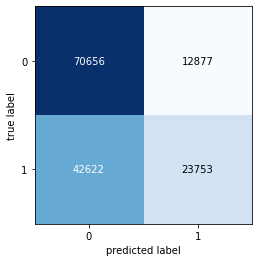

In [90]:
# Cria a matriz de Confusão
cm = confusion_matrix(y_test, y_pred)

# Plot da Matriz de Confusão
plot_confusion_matrix(conf_mat=cm)

# Mostra o Gráfico
plt.show()

__C)__ Para o caso do COVID, a classificação padrão da Regressão Logística é a mais adequada? (Ao aplicarmos o `predict`, o modelo vai calcular as probabilidade e para os casos maior que 0.5 ele atribui como da classe 1). Teste diferentes _thresholds_.

Vamos testar diferentes _thresholds_ para avaliar qual seria a melhor aplicação para o caso do COVID. Para isso, iremos utilizar o`predict_proba`:

In [91]:
# Criando o predict proba para a base de teste
y_proba_test = model.predict_proba(X_test_std)
y_proba_test

array([[0.57486363, 0.42513637],
       [0.6264061 , 0.3735939 ],
       [0.56058469, 0.43941531],
       ...,
       [0.51974805, 0.48025195],
       [0.45356174, 0.54643826],
       [0.72387022, 0.27612978]])

In [92]:
# trazer a resposta para junto das probabilidades
results_test = pd.DataFrame(y_test)

# Pegando a probabilidade em estar com COVID (classe 1)
results_test['proba'] = np.round(y_proba_test[:,1], 3)

In [93]:
# Criando um dataframe com a probabilidade da classe 1 e a marcação de target
results_test.head()

,covid_res,proba
373402,0,0.425
181022,1,0.374
317841,0,0.439
272745,0,0.362
153280,1,0.593


In [94]:
# Parâmetros para o Looping

threshold_increment  = 0.02
threshold_begin = threshold_increment
threshold_end    = 1.0

Vamos fazer um _loop_ onde será testados diversos _thresholds_ variando em 0.2 e de 0.2 a 1:

In [95]:
# Para cada threshold, no looping calcula TN, FN, FP, TP e outras métricas

list_threshold  = []
list_TN         = []
list_FN         = []
list_FP         = []
list_TP         = []
list_precision  = []
list_recall     = []
list_accuracy   = []
list_f1_score   = []

for i in np.arange(threshold_begin, threshold_end + threshold_increment, threshold_increment):
    i_threshold = np.round(i, 2)
    print(str(i_threshold) + ' ', end = '')
    
    results_test['y_pred'] = results_test['proba'].apply(lambda x: 1 if x >= i_threshold else 0)
    results_test['flag_TN'] = np.where((results_test['y_pred'] == 0) & (results_test['covid_res'] == 0), 1, 0)
    results_test['flag_FN'] = np.where((results_test['y_pred'] == 0) & (results_test['covid_res'] == 1), 1, 0)
    results_test['flag_TP'] = np.where((results_test['y_pred'] == 1) & (results_test['covid_res'] == 1), 1, 0)
    results_test['flag_FP'] = np.where((results_test['y_pred'] == 1) & (results_test['covid_res'] == 0), 1, 0)
  
    TN = results_test['flag_TN'].sum()
    FN = results_test['flag_FN'].sum()
    TP = results_test['flag_TP'].sum()
    FP = results_test['flag_FP'].sum()
    
    precision = np.where((TP + FP) > 0, TP / (TP + FP), 0)
    recall = np.where((TP + FN) > 0, TP / (TP + FN), 0)
    accuracy = np.where((TN + FN + TP + FP) > 0, 
                         (TP + TN)/(TN + FN + TP + FP), 0)
    f1_score = np.where((precision + recall) > 0, (2 * precision * recall)/(precision + recall), 0)
    
    list_threshold.append(i_threshold)
    list_TN.append(TN)
    list_FN.append(FN)
    list_FP.append(FP)
    list_TP.append(TP)
    list_precision.append(np.round(precision, 4))
    list_recall.append(np.round(recall, 4))
    list_accuracy.append(np.round(accuracy, 4))
    list_f1_score.append(np.round(f1_score, 4))

#---------------------
dict_output = {
  "threshold" : list_threshold, 
  "TN" : list_TN,
  "FN" : list_FN,
  "FP" : list_FP,
  "TP" : list_TP,
  "precision" : list_precision,
  "recall" : list_recall,
  "accuracy" : list_accuracy,
  "f1_score" : list_f1_score
}

df_results = pd.DataFrame(dict_output)

0.02 0.04 0.06 0.08 0.1 0.12 0.14 0.16 0.18 0.2 0.22 0.24 0.26 0.28 0.3 0.32 0.34 0.36 0.38 0.4 0.42 0.44 0.46 0.48 0.5 0.52 0.54 0.56 0.58 0.6 0.62 0.64 0.66 0.68 0.7 0.72 0.74 0.76 0.78 0.8 0.82 0.84 0.86 0.88 0.9 0.92 0.94 0.96 0.98 1.0 

In [96]:
# Avaliando os resultados
df_results

,threshold,TN,FN,FP,TP,precision,recall,accuracy,f1_score
0,0.02,0,0,83533,66375,0.4428,1.0000,0.4428,0.6138
1,0.04,0,0,83533,66375,0.4428,1.0000,0.4428,0.6138
2,0.06,2,0,83531,66375,0.4428,1.0000,0.4428,0.6138
3,0.08,12,5,83521,66370,0.4428,0.9999,0.4428,0.6138
4,0.10,15,7,83518,66368,0.4428,0.9999,0.4428,0.6138
5,0.12,21,8,83512,66367,0.4428,0.9999,0.4429,0.6138
6,0.14,28,12,83505,66363,0.4428,0.9998,0.4429,0.6138
7,0.16,68,27,83465,66348,0.4429,0.9996,0.4430,0.6138
8,0.18,122,46,83411,66329,0.4430,0.9993,0.4433,0.6138
9,0.20,249,86,83284,66289,0.4432,0.9987,0.4439,0.6139


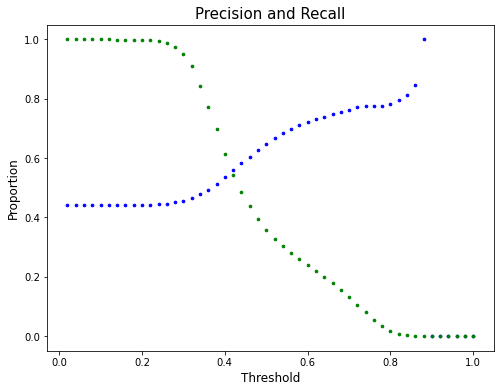

In [102]:
# Precison-Recall-Threshold Curve

# variavel de proporção para os gráficos
k = 2

# Define o tamanho da figura
fig = plt.figure(figsize = (k*4,k*3))

# Definindo a janela de plot
ax1 = fig.add_subplot(111)

# Scatter do Precision
ax1.scatter(df_results['threshold'], df_results['precision'], color = 'b', s = 7)

# Scatter do Recall
ax1.scatter(df_results['threshold'], df_results['recall']   , color = 'g', s = 7)

# Configurações dos exiso
ax1.set_xlabel('Threshold', fontsize = 12)
ax1.set_ylabel('Proportion', fontsize = 12)

# Cria titulo
plt.title("Precision and Recall", fontsize = 15)

# Mostra o gráfico
plt.show()

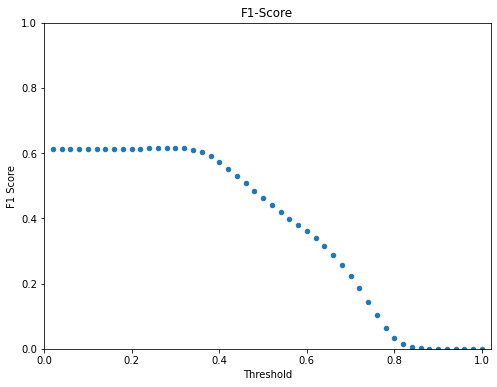

In [103]:
# Curva F1-Score

# Cria o plot
grap = df_results[df_results["threshold"] > 0.0].plot(kind="scatter", 
                                                         x="threshold", 
                                                         y="f1_score", 
                                                         grid=False, 
                                                         legend=True, 
                                                         title="F1-Score",
                                                         figsize=[8,6])
# Configurações do gráfico
grap.set(xlabel="Threshold", 
            ylabel="F1 Score", 
            xlim=(0.0,1.02), 
            ylim=(0.0,1.0))

# mostra o gráfico
plt.show()

Para mudarmos o _threshold_ sem impactar tanto a precisão ou a revocação, vamos utilizar o ponto onde o valor do F1-score seja máximo:

In [99]:
# Cria a resposta com o novo threshold
y_pred2 = np.where(y_proba_test[:,1] >= 0.3, 1, 0)
y_pred2

array([1, 1, 1, ..., 1, 1, 0])

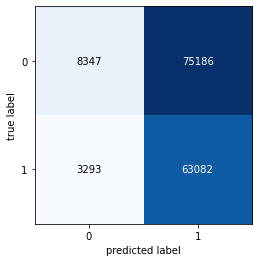

In [100]:
# Cria a matriz de confusão
cm = confusion_matrix(y_test, y_pred2)

# plot da matriz de confusão
plot_confusion_matrix(conf_mat=cm)

# Mostra o gráfico
plt.show()

In [101]:
# Mostra o classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.72      0.10      0.18     83533
           1       0.46      0.95      0.62     66375

    accuracy                           0.48    149908
   macro avg       0.59      0.53      0.40    149908
weighted avg       0.60      0.48      0.37    149908



Agora, interpretando os dados no contexto onde era o início do espalhamento da COVID pelo mundo, um modelo onde superestime os casos (ou seja preferencia Falsos NEgativos) seria melhor no quesito das pessoas se resguardarem em quarentena dentro de suas casos, ao invés de deixar que o vírus se propague com uma pessoa sendo um Falso Positivo.